# 色々なサウンドファイルをFFTしてグラフ表示するスクリプト

## Usage
filenameとformatをお好みの設定に直してお楽しみください．

ファイルの読み込みはどちらか一方をコメントアウトしてください．

## CuPy版

mp3等をFFTするときはとても時間がかかるのでCuPyでGPUを使うことをおすすめします．

扱えないファイル形式があるため通常はScipy版を使ってください．

※ cupyのバージョンは4.0.0rc1を使用しました．古いcupyだとfftがないので注意してください．

## WAV素材サイト
https://www3.nd.edu/~dthain/courses/cse20211/fall2013/wavfile/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydub

# 入力ファイルの名前とフォーマット形式の設定
filename = 'sound.mp3'
format = 'mp3'

In [2]:
# ファイルの読み込み(cupy版)
#import cupy as cp

#cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)
#data = pydub.AudioSegment.from_file(filename, format)
#y = data.get_array_of_samples()
#y = cp.array(y)
#yf = cp.asnumpy(cp.fft.fft(y))
#rate = float(pydub.utils.mediainfo(filename)['sample_rate'])
#x = np.fft.fftfreq(len(yf), 1 / rate)

In [3]:
# ファイルの読み込み(scipy版)
import scipy.fftpack

data = pydub.AudioSegment.from_file(filename, format)
y = data.get_array_of_samples()
yf = scipy.fftpack.fft(y)
rate = float(pydub.utils.mediainfo(filename)['sample_rate'])
x = scipy.fftpack.fftfreq(len(yf), 1 / rate)

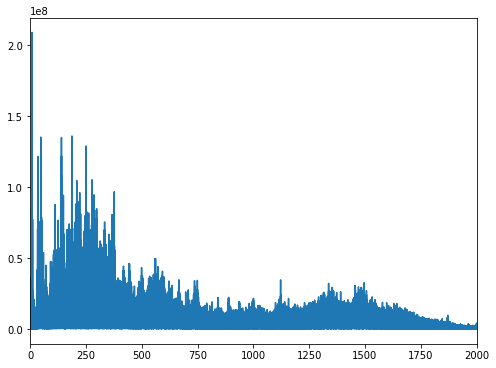

In [4]:
# 出力するグラフのサイズ設定
plt.rcParams['figure.figsize'] = (8, 6)

# 出力するグラフのx軸の範囲設定
plt.xlim(0, 2000)

# グラフの表示
plt.plot(x, np.abs(yf))
plt.show()